In [1]:
import pandas as pd

In [2]:
oneplus_review_total = pd.read_csv('C:\\Users\\admin\\Downloads\\reviews (1).csv')
# Review extracted using 'Amazon Reviews Exporter'

In [3]:
oneplus_review_total

,title,rating
0,Claim for Replacement of Oneplus 9R phone...,1
1,Heating issue,1
2,Amazing - True Flagship,5
3,Over heat mobile,1
4,HEATING ISSUE,1
...,...,...
2046,"It's a complete package u, only miss the earph...",4
2047,Assam,5
2048,Slightly improved version of OnePlus 8t,4
2049,Average Product,3


In [4]:
oneplus_review = oneplus_review_total.drop('rating' ,axis=1 )

In [5]:
oneplus_review

,title
0,Claim for Replacement of Oneplus 9R phone...
1,Heating issue
2,Amazing - True Flagship
3,Over heat mobile
4,HEATING ISSUE
...,...
2046,"It's a complete package u, only miss the earph..."
2047,Assam
2048,Slightly improved version of OnePlus 8t
2049,Average Product


In [6]:
import numpy as np 
import string 
import spacy 
from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
%matplotlib inline

In [7]:
oneplus_review['title'] = oneplus_review['title'].astype(str)

In [8]:
oneplus_review = [x.strip() for x in oneplus_review.title] # remove both the leading and the trailing characters
oneplus_review = [x for x in oneplus_review if x] # removes empty strings
oneplus_review

['Claim for Replacement of Oneplus 9R phone...',
 'Heating issue',
 'Amazing - True Flagship',
 'Over heat mobile',
 'HEATING ISSUE',
 'Dissapointed.. Big No',
 'Battery issues',
 'Wonderful phone for the price.',
 'WORST CAMERA... EVER',
 'move from OPT3T to 9R best device (No Heating issue after update) :)',
 'Facing Network issue ( Mobile Data)',
 'Review after 3 weeks of usage',
 "It's a blunder from OnePlus",
 'One word !!!! Pathetic 🥺',
 'No more a 5G phone',
 "OnePlus 9R Average mobile, don't expect much",
 'Good phone but unable to use coz of heating issues',
 'Value for money 💰💰💰',
 'Review after days of extensive use!',
 'Shitty 9 series',
 'Beast with a cute look',
 'Poor camera for this price tag',
 'Late responding Camera & heating problem',
 'Aamazing phone 🥰',
 'Matches expectations',
 'Average',
 'Love it 😘',
 'Best in class',
 'Faster Phone with faster battery drainage',
 'A decent buy',
 'Nice purchase',
 'Poor poor camera',
 'Honest review',
 "I won't recommend this 

In [10]:
# Joining the list into one string/text
reviews_text=' '.join(oneplus_review)
reviews_text[0:500]

"Claim for Replacement of Oneplus 9R phone... Heating issue Amazing - True Flagship Over heat mobile HEATING ISSUE Dissapointed.. Big No Battery issues Wonderful phone for the price. WORST CAMERA... EVER move from OPT3T to 9R best device (No Heating issue after update) :) Facing Network issue ( Mobile Data) Review after 3 weeks of usage It's a blunder from OnePlus One word !!!! Pathetic 🥺 No more a 5G phone OnePlus 9R Average mobile, don't expect much Good phone but unable to use coz of heating i"

In [12]:
# Remove Punctuations 
no_punc_text=reviews_text.translate(str.maketrans('','',string.punctuation))
no_punc_text[0:500]

'Claim for Replacement of Oneplus 9R phone Heating issue Amazing  True Flagship Over heat mobile HEATING ISSUE Dissapointed Big No Battery issues Wonderful phone for the price WORST CAMERA EVER move from OPT3T to 9R best device No Heating issue after update  Facing Network issue  Mobile Data Review after 3 weeks of usage Its a blunder from OnePlus One word  Pathetic 🥺 No more a 5G phone OnePlus 9R Average mobile dont expect much Good phone but unable to use coz of heating issues Value for money 💰'

In [13]:
# Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
from nltk import word_tokenize
text_tokens=word_tokenize(no_punc_text)
print(text_tokens[0:100])

['Claim', 'for', 'Replacement', 'of', 'Oneplus', '9R', 'phone', 'Heating', 'issue', 'Amazing', 'True', 'Flagship', 'Over', 'heat', 'mobile', 'HEATING', 'ISSUE', 'Dissapointed', 'Big', 'No', 'Battery', 'issues', 'Wonderful', 'phone', 'for', 'the', 'price', 'WORST', 'CAMERA', 'EVER', 'move', 'from', 'OPT3T', 'to', '9R', 'best', 'device', 'No', 'Heating', 'issue', 'after', 'update', 'Facing', 'Network', 'issue', 'Mobile', 'Data', 'Review', 'after', '3', 'weeks', 'of', 'usage', 'Its', 'a', 'blunder', 'from', 'OnePlus', 'One', 'word', 'Pathetic', '🥺', 'No', 'more', 'a', '5G', 'phone', 'OnePlus', '9R', 'Average', 'mobile', 'dont', 'expect', 'much', 'Good', 'phone', 'but', 'unable', 'to', 'use', 'coz', 'of', 'heating', 'issues', 'Value', 'for', 'money', '💰💰💰', 'Review', 'after', 'days', 'of', 'extensive', 'use', 'Shitty', '9', 'series', 'Beast', 'with', 'a']


In [18]:
len(lower_words)

8309

In [25]:
# Remove stopwords
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')

sw_list=['I','The','It','A','OnePlus','oneplus','Oneplus','9','9r']
my_stop_words.extend(sw_list)

no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens[0:500])

['Claim', 'Replacement', '9R', 'phone', 'Heating', 'issue', 'Amazing', 'True', 'Flagship', 'Over', 'heat', 'mobile', 'HEATING', 'ISSUE', 'Dissapointed', 'Big', 'No', 'Battery', 'issues', 'Wonderful', 'phone', 'price', 'WORST', 'CAMERA', 'EVER', 'move', 'OPT3T', '9R', 'best', 'device', 'No', 'Heating', 'issue', 'update', 'Facing', 'Network', 'issue', 'Mobile', 'Data', 'Review', '3', 'weeks', 'usage', 'Its', 'blunder', 'One', 'word', 'Pathetic', '🥺', 'No', '5G', 'phone', '9R', 'Average', 'mobile', 'dont', 'expect', 'much', 'Good', 'phone', 'unable', 'use', 'coz', 'heating', 'issues', 'Value', 'money', '💰💰💰', 'Review', 'days', 'extensive', 'use', 'Shitty', 'series', 'Beast', 'cute', 'look', 'Poor', 'camera', 'price', 'tag', 'Late', 'responding', 'Camera', 'heating', 'problem', 'Aamazing', 'phone', '🥰', 'Matches', 'expectations', 'Average', 'Love', '😘', 'Best', 'class', 'Faster', 'Phone', 'faster', 'battery', 'drainage', 'decent', 'buy', 'Nice', 'purchase', 'Poor', 'poor', 'camera', 'Hones

In [27]:
# Normalize the data
lower_words=[comment.lower() for comment in no_stop_tokens]
print(lower_words[0:500])

['claim', 'replacement', '9r', 'phone', 'heating', 'issue', 'amazing', 'true', 'flagship', 'over', 'heat', 'mobile', 'heating', 'issue', 'dissapointed', 'big', 'no', 'battery', 'issues', 'wonderful', 'phone', 'price', 'worst', 'camera', 'ever', 'move', 'opt3t', '9r', 'best', 'device', 'no', 'heating', 'issue', 'update', 'facing', 'network', 'issue', 'mobile', 'data', 'review', '3', 'weeks', 'usage', 'its', 'blunder', 'one', 'word', 'pathetic', '🥺', 'no', '5g', 'phone', '9r', 'average', 'mobile', 'dont', 'expect', 'much', 'good', 'phone', 'unable', 'use', 'coz', 'heating', 'issues', 'value', 'money', '💰💰💰', 'review', 'days', 'extensive', 'use', 'shitty', 'series', 'beast', 'cute', 'look', 'poor', 'camera', 'price', 'tag', 'late', 'responding', 'camera', 'heating', 'problem', 'aamazing', 'phone', '🥰', 'matches', 'expectations', 'average', 'love', '😘', 'best', 'class', 'faster', 'phone', 'faster', 'battery', 'drainage', 'decent', 'buy', 'nice', 'purchase', 'poor', 'poor', 'camera', 'hones

In [29]:
# Lemmatization
nlp=spacy.load('en_core_web_sm')
doc=nlp(' '.join(lower_words))
print(doc[0:500])

claim replacement 9r phone heating issue amazing true flagship over heat mobile heating issue dissapointed big no battery issues wonderful phone price worst camera ever move opt3t 9r best device no heating issue update facing network issue mobile data review 3 weeks usage its blunder one word pathetic 🥺 no 5g phone 9r average mobile dont expect much good phone unable use coz heating issues value money 💰💰💰 review days extensive use shitty series beast cute look poor camera price tag late responding camera heating problem aamazing phone 🥰 matches expectations average love 😘 best class faster phone faster battery drainage decent buy nice purchase poor poor camera honest review wont recommend phone anyone worst speakers display quality bad best flagship phone ever💯🎉⚡ 9r better option dont care topend chipset premium camera old wine new bottle still value money heating phone like hot bag simply superb 35 5 phone starts heating like desicheap phone don ’ waste bucks phone justifies value bat

In [30]:
lemmas=[token.lemma_ for token in doc]
print(lemmas[0:500])


['claim', 'replacement', '9r', 'phone', 'heating', 'issue', 'amazing', 'true', 'flagship', 'over', 'heat', 'mobile', 'heating', 'issue', 'dissapointe', 'big', 'no', 'battery', 'issue', 'wonderful', 'phone', 'price', 'bad', 'camera', 'ever', 'move', 'opt3', 't', '9r', 'good', 'device', 'no', 'heating', 'issue', 'update', 'face', 'network', 'issue', 'mobile', 'datum', 'review', '3', 'week', 'usage', 'its', 'blunder', 'one', 'word', 'pathetic', '🥺', 'no', '5', 'g', 'phone', '9r', 'average', 'mobile', 'do', 'not', 'expect', 'much', 'good', 'phone', 'unable', 'use', 'coz', 'heating', 'issue', 'value', 'money', '💰', '💰', '💰', 'review', 'day', 'extensive', 'use', 'shitty', 'series', 'beast', 'cute', 'look', 'poor', 'camera', 'price', 'tag', 'late', 'respond', 'camera', 'heating', 'problem', 'aamaze', 'phone', '🥰', 'match', 'expectation', 'average', 'love', '😘', 'good', 'class', 'fast', 'phone', 'fast', 'battery', 'drainage', 'decent', 'buy', 'nice', 'purchase', 'poor', 'poor', 'camera', 'hone

In [33]:
clean_reviews=' '.join(lemmas) 
clean_reviews[0:500]

'claim replacement 9r phone heating issue amazing true flagship over heat mobile heating issue dissapointe big no battery issue wonderful phone price bad camera ever move opt3 t 9r good device no heating issue update face network issue mobile datum review 3 week usage its blunder one word pathetic 🥺 no 5 g phone 9r average mobile do not expect much good phone unable use coz heating issue value money 💰 💰 💰 review day extensive use shitty series beast cute look poor camera price tag late respond ca'

# Emotion Mining

In [35]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(oneplus_review))
sentences[0:50]

['Claim for Replacement of Oneplus 9R phone...',
 'Heating issue Amazing - True Flagship Over heat mobile HEATING ISSUE Dissapointed.. Big No Battery issues Wonderful phone for the price.',
 'WORST CAMERA...',
 "EVER move from OPT3T to 9R best device (No Heating issue after update) :) Facing Network issue ( Mobile Data) Review after 3 weeks of usage It's a blunder from OnePlus One word !!!!",
 "Pathetic 🥺 No more a 5G phone OnePlus 9R Average mobile, don't expect much Good phone but unable to use coz of heating issues Value for money 💰💰💰 Review after days of extensive use!",
 "Shitty 9 series Beast with a cute look Poor camera for this price tag Late responding Camera & heating problem Aamazing phone 🥰 Matches expectations Average Love it 😘 Best in class Faster Phone with faster battery drainage A decent buy Nice purchase Poor poor camera Honest review I won't recommend this phone to anyone Worst speakers and display quality is bad Best flagship phone ever💯🎉⚡ OnePlus 9R  better option 

In [36]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,Claim for Replacement of Oneplus 9R phone...
1,Heating issue Amazing - True Flagship Over hea...
2,WORST CAMERA...
3,EVER move from OPT3T to 9R best device (No Hea...
4,Pathetic 🥺 No more a 5G phone OnePlus 9R Avera...
...,...
296,Quality Valabile mobile Amazing Phone I wonder...
297,Wow loved the phone Very nice Camera is awesom...
298,Processor One plus AWESOME PRODUCT Do not orde...
299,Performance is not as expected but okay It's n...


In [38]:
# Emotion Lexicon - Affin
affin = pd.read_csv('F:\\PYTHON\\DATA SCIENCE\\Text Mining\\Data Sets\\Afinn.csv',sep=',', encoding='latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [39]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [40]:
# Custom function: score each word in a sentence in lemmatised form, but calculate the score for the whole original sentence
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [41]:
# manual testing
calculate_sentiment(text='worst')

-3

In [42]:
# Calculating sentiment value for each sentence
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0       0
1       8
2      -3
3       2
4       2
       ..
296     6
297    25
298     6
299    18
300     5
Name: sentiment_value, Length: 301, dtype: int64

In [43]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)
sent_df['word_count']

0       7
1      21
2       2
3      34
4      34
       ..
296    42
297    22
298    24
299    89
300    12
Name: word_count, Length: 301, dtype: int64

In [44]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
7,Phone starts heating like a desi/cheap phone D...,-11,68
291,Bad Smoothly Worst mobile.,-6,4
27,Worst mobile ever Not upto the expectation No ...,-5,13
67,Improper battery drain Worst phone I ever boug...,-5,46
68,"Pathetic, screen turns black everytime anyone ...",-5,20
...,...,...,...
266,Oneline good battery life avg phone not satisf...,39,144
282,Heating issue Lagging problem Nice phone Never...,44,97
290,Nice product Nice product Best *#06# no showin...,49,125
257,Touching experience is good Good one plus bran...,52,128


In [45]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    301.000000
mean       6.767442
std        9.642220
min      -11.000000
25%        0.000000
50%        3.000000
75%       10.000000
max       61.000000
Name: sentiment_value, dtype: float64

In [46]:
# negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
0,Claim for Replacement of Oneplus 9R phone...,0,7
2,WORST CAMERA...,-3,2
6,3.5 / 5.,0,3
7,Phone starts heating like a desi/cheap phone D...,-11,68
8,Not as per legacally 1plus phones Overheating ...,0,10
...,...,...,...
285,Suitable for it's pricing.,0,4
286,Camera 📷 quality is also average.,0,6
287,Not better.,0,2
291,Bad Smoothly Worst mobile.,-6,4


In [47]:
# positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
1,Heating issue Amazing - True Flagship Over hea...,8,21
3,EVER move from OPT3T to 9R best device (No Hea...,2,34
4,Pathetic 🥺 No more a 5G phone OnePlus 9R Avera...,2,34
5,Shitty 9 series Beast with a cute look Poor ca...,9,101
9,Worts experience with amazone+seller+ oneplus ...,15,47
...,...,...,...
296,Quality Valabile mobile Amazing Phone I wonder...,6,42
297,Wow loved the phone Very nice Camera is awesom...,25,22
298,Processor One plus AWESOME PRODUCT Do not orde...,6,24
299,Performance is not as expected but okay It's n...,18,89


In [48]:
# Adding index cloumn
sent_df['index']=range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,Claim for Replacement of Oneplus 9R phone...,0,7,0
1,Heating issue Amazing - True Flagship Over hea...,8,21,1
2,WORST CAMERA...,-3,2,2
3,EVER move from OPT3T to 9R best device (No Hea...,2,34,3
4,Pathetic 🥺 No more a 5G phone OnePlus 9R Avera...,2,34,4
...,...,...,...,...
296,Quality Valabile mobile Amazing Phone I wonder...,6,42,296
297,Wow loved the phone Very nice Camera is awesom...,25,22,297
298,Processor One plus AWESOME PRODUCT Do not orde...,6,24,298
299,Performance is not as expected but okay It's n...,18,89,299


C:\Users\admin\anaconda3.2\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

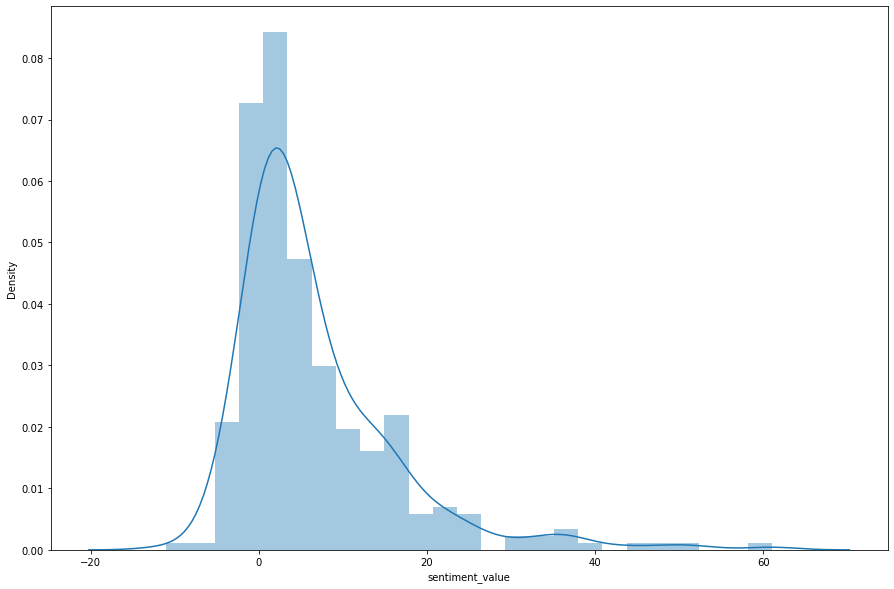

In [49]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.distplot(sent_df['sentiment_value'])

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

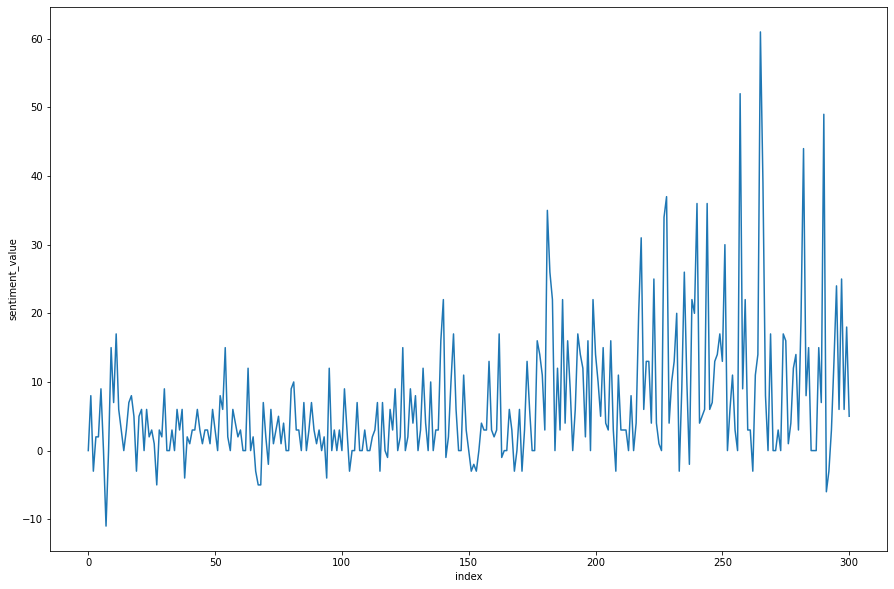

In [50]:
# Plotting the line plot for sentiment value of whole review
plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)